In [ ]:
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv('/content/Listado_de_Negocios_Verdes_20240524.csv')
df_poblacion=pd.read_csv('/content/_Total_de_personas.xls.csv')

In [ ]:



df_negocios = pd.read_csv("/content/Listado_de_Negocios_Verdes_20240524.csv")

def clean_column_name(col_name):
    return re.sub(r'\s*\(.*?\)\s*', '', col_name)

df_negocios.columns = [clean_column_name(col) for col in df.columns]


print(df.columns)


Index(['AÑO \n(Año de registro)',
       'AUTORIDAD AMBIENTAL\n(Donde se encuentra el Negocio Verde)',
       'REGIÓN\n(Donde se encuentra el Negocio Verde)',
       'DEPARTAMENTO\n(Donde se encuentra el Negocio Verde)',
       'MUNICIPIO\n(Donde se encuentra el Negocio Verde)',
       'RAZÓN SOCIAL\n(Del Negocio Verde)', 'Descripción\n(Del Negocio Verde)',
       'CATEGORÍA\n(Del Negocio Verde)',
       'SECTOR\n(Al cual pertenece el Negocio Verde)',
       'SUBSECTOR\n(Al cual pertenece el Negocio Verde)',
       'Producto Principal\n(Que promueve el Negocio Verde)',
       'CATEGORÍA COMERCIAL\n(Al cual pertenece el Negocio Verde)',
       'NOMBRE REPRESENTANTE\n(Del Negocio Verde)'],
      dtype='object')


In [ ]:

print(df_negocios.head())

print(df_negocios.describe())

print(df_negocios.info())


    AÑO AUTORIDAD AMBIENTAL       REGIÓN DEPARTAMENTO            MUNICIPIO  \
0  2022          CORPOCESAR  No registra        Cesar           Valledupar   
1  2022          CORPOCESAR  No registra        Cesar      Agustín Codazzi   
2  2022          CORPOCESAR  No registra        Cesar  La Jagua de Ibirico   
3  2022          CORPOCESAR  No registra        Cesar           Valledupar   
4  2022          CORPOCESAR  No registra        Cesar           Valledupar   

                                RAZÓN SOCIAL  \
0                        Hoteles De Upar SAS   
1                                 La Mellita   
2                                 Vinos Kike   
3                                   Delitcha   
4  Fundación Mentes Brillantes Para El Mundo   

                                         Descripción  \
0  Hoteles de Upar SAS, presta el servicio de hos...   
1  La empresa la Mellita produce (queso de cabra ...   
2  El proceso de Vinos Kike comienza con la compr...   
3  Delitcha, es un

In [ ]:
df_negocios_2018 = df_negocios[df_negocios['AÑO'] == 2018]


print(df_negocios_2018.info())

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 2669 to 3343
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AÑO                   675 non-null    int64 
 1   AUTORIDAD AMBIENTAL   675 non-null    object
 2   REGIÓN                675 non-null    object
 3   DEPARTAMENTO          675 non-null    object
 4   MUNICIPIO             675 non-null    object
 5   RAZÓN SOCIAL          675 non-null    object
 6   Descripción           675 non-null    object
 7   CATEGORÍA             675 non-null    object
 8   SECTOR                675 non-null    object
 9   SUBSECTOR             675 non-null    object
 10  Producto Principal    675 non-null    object
 11  CATEGORÍA COMERCIAL   673 non-null    object
 12  NOMBRE REPRESENTANTE  675 non-null    object
dtypes: int64(1), object(12)
memory usage: 73.8+ KB
None


In [ ]:
print(df_poblacion.head())


print(df_poblacion.info())
print(df_poblacion.describe())

  cod_departamento  departamento  tot_viviendas  tot_hogares  \
5        ANTIOQUIA       1933583        1983566      5974788   
5        ANTIOQUIA       1570407        1612422      4779570   
5        ANTIOQUIA        100726         103229       331657   
5        ANTIOQUIA        262450         267915       863561   
8        ATLANTICO        598179         625123      2342265   

         tot_personas  clase  
5               Total    NaN  
5  Cabecera municipal    NaN  
5    Centros poblados    NaN  
5      Rural disperso    NaN  
8               Total    NaN  
<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 5 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cod_departamento  132 non-null    object 
 1   departamento      132 non-null    int64  
 2   tot_viviendas     132 non-null    int64  
 3   tot_hogares       132 non-null    int64  
 4   tot_personas      132 non-null    object 
 5

In [ ]:
df_poblacion = df_poblacion.rename(columns={'cod_departamento': 'Departamento', 'departamento': 'Poblacion'})

In [ ]:
print(df_poblacion.head())


print(df_poblacion.info())
print(df_poblacion.describe())

  Departamento  Poblacion  tot_viviendas  tot_hogares        tot_personas  \
5    ANTIOQUIA    1933583        1983566      5974788               Total   
5    ANTIOQUIA    1570407        1612422      4779570  Cabecera municipal   
5    ANTIOQUIA     100726         103229       331657    Centros poblados   
5    ANTIOQUIA     262450         267915       863561      Rural disperso   
8    ATLANTICO     598179         625123      2342265               Total   

   clase  
5    NaN  
5    NaN  
5    NaN  
5    NaN  
8    NaN  
<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 5 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Departamento   132 non-null    object 
 1   Poblacion      132 non-null    int64  
 2   tot_viviendas  132 non-null    int64  
 3   tot_hogares    132 non-null    int64  
 4   tot_personas   132 non-null    object 
 5   clase          0 non-null      float64
dtypes: float64(1), i

In [ ]:
df_poblacion_agrupado = df_poblacion.groupby('Departamento')['Poblacion'].sum().reset_index()


print(df_poblacion_agrupado.head())

                                        Departamento  Poblacion
0                                           AMAZONAS      30844
1                                          ANTIOQUIA    3867166
2                                             ARAUCA     141988
3  ARCHIPIELAGO DE SAN ANDRES-PROVIDENCIA Y SANTA...      32394
4                                          ATLANTICO    1196358


In [ ]:

negocios_por_departamento = df_negocios_2018.groupby('DEPARTAMENTO').size().reset_index(name='Total_Negocios_Verdes')


negocios_por_departamento = negocios_por_departamento.rename(columns={'DEPARTAMENTO': 'Departamento'})


In [ ]:
negocios_por_departamento.head()

,Departamento,Total_Negocios_Verdes
0,Amazonas,31
1,Antioquia,18
2,"Archipiélago de San Andrés, Providencia y Sant...",12
3,Atlántico,13
4,"Bogotá, D.C.",2


In [ ]:
negocios_por_departamento['Departamento'] = negocios_por_departamento['Departamento'].astype(str)

In [ ]:
negocios_por_departamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Departamento           31 non-null     object
 1   Total_Negocios_Verdes  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [ ]:
df_poblacion_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Departamento  33 non-null     object
 1   Poblacion     33 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 656.0+ bytes


In [ ]:


def normalize_text(text):
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    return text.lower()


df_poblacion_agrupado['Departamento'] = df_poblacion_agrupado['Departamento'].apply(normalize_text)
negocios_por_departamento['Departamento'] = negocios_por_departamento['Departamento'].apply(normalize_text)


negocios_por_departamento['Departamento'] = negocios_por_departamento['Departamento'].replace(
    'archipielago de san andres, providencia y santa catalina',
    'archipielago de san andres-providencia y santa catalina'
)


df_poblacion_agrupado = df_poblacion_agrupado.rename(columns={'Poblacion': 'Total_Poblacion'})

df_final = pd.merge(negocios_por_departamento, df_poblacion_agrupado, on='Departamento', how='left')

df_final['Negocios_Verdes_Per_Capita'] = df_final['Total_Negocios_Verdes'] / df_final['Total_Poblacion']

print(df_final[['Departamento', 'Total_Negocios_Verdes', 'Total_Poblacion', 'Negocios_Verdes_Per_Capita']])

                                         Departamento  Total_Negocios_Verdes  \
0                                            amazonas                     31   
1                                           antioquia                     18   
2   archipielago de san andres-providencia y santa...                     12   
3                                           atlantico                     13   
4                                        bogota, d.c.                      2   
5                                             bolivar                     26   
6                                              boyaca                     12   
7                                              caldas                     43   
8                                             caqueta                     57   
9                                            casanare                      7   
10                                              cauca                      9   
11                                      

In [ ]:
print(df_negocios_2018.describe(include='all'))

# Distribución de los negocios verdes por departamento
negocios_por_departamento = df_negocios_2018['DEPARTAMENTO'].value_counts()
print(negocios_por_departamento)








           AÑO AUTORIDAD AMBIENTAL    REGIÓN DEPARTAMENTO  MUNICIPIO  \
count    675.0                 675       675          675        675   
unique     NaN                  34         8           31        235   
top        NaN       CORPOAMAZONÍA  Amazonía     Putumayo  Florencia   
freq       NaN                 169       189           81         41   
mean    2018.0                 NaN       NaN          NaN        NaN   
std        0.0                 NaN       NaN          NaN        NaN   
min     2018.0                 NaN       NaN          NaN        NaN   
25%     2018.0                 NaN       NaN          NaN        NaN   
50%     2018.0                 NaN       NaN          NaN        NaN   
75%     2018.0                 NaN       NaN          NaN        NaN   
max     2018.0                 NaN       NaN          NaN        NaN   

                                            RAZÓN SOCIAL  \
count                                                675   
unique         

In [ ]:
# Distribución de los negocios verdes por categoría
negocios_por_categoria = df_negocios_2018['CATEGORÍA'].value_counts()
print(negocios_por_categoria)

CATEGORÍA
1. Bienes y servicios sostenibles provenientes de los Recursos Naturales    574
2. Ecoproductos Industriales                                                101
Name: count, dtype: int64


In [ ]:
# Distribución de los negocios verdes por sector
negocios_por_sector = df_negocios_2018['SECTOR'].value_counts()
print(negocios_por_sector)

SECTOR
1.3. Biocomercio                                       213
1.1. Agrosistemas sostenibles                          184
1.2. Agroindustria Sostenible                          171
2.1. Aprovechamiento y valoración de Residuos           69
2.5. Otros bienes / servicios verdes sostenibles        17
2.3. Construcción sostenible                             8
1.4. Negocios para la restauración                       6
2.1. Aprovechamiento y valoración de residuos            4
2.2. Fuentes no convencionales de energía renovable      3
Name: count, dtype: int64


In [ ]:
# Departamentos con más y menos negocios verdes
top_departamentos = negocios_por_departamento.head(10)
bottom_departamentos = negocios_por_departamento.tail(10)
print(top_departamentos)
print(bottom_departamentos)


DEPARTAMENTO
Putumayo        81
Caquetá         57
Chocó           54
Santander       53
Córdoba         47
Caldas          43
Cundinamarca    35
Amazonas        31
Bolívar         26
Sucre           25
Name: count, dtype: int64
DEPARTAMENTO
Tolima          11
Vaupés           9
Risaralda        9
Cauca            9
Casanare         7
Guaviare         6
Guainía          5
Quindío          5
Magdalena        2
Bogotá, D.C.     2
Name: count, dtype: int64


In [ ]:
# Categorías y sectores más comunes
top_categorias = negocios_por_categoria.head(10)
top_sectores = negocios_por_sector.head(10)
print(top_categorias)
print(top_sectores)

CATEGORÍA
1. Bienes y servicios sostenibles provenientes de los Recursos Naturales    574
2. Ecoproductos Industriales                                                101
Name: count, dtype: int64
SECTOR
1.3. Biocomercio                                       213
1.1. Agrosistemas sostenibles                          184
1.2. Agroindustria Sostenible                          171
2.1. Aprovechamiento y valoración de Residuos           69
2.5. Otros bienes / servicios verdes sostenibles        17
2.3. Construcción sostenible                             8
1.4. Negocios para la restauración                       6
2.1. Aprovechamiento y valoración de residuos            4
2.2. Fuentes no convencionales de energía renovable      3
Name: count, dtype: int64


In [ ]:
print(df_final.head())


                                        Departamento  Total_Negocios_Verdes  \
0                                           amazonas                     31   
1                                          antioquia                     18   
2  archipielago de san andres-providencia y santa...                     12   
3                                          atlantico                     13   
4                                       bogota, d.c.                      2   

   Total_Poblacion  Negocios_Verdes_Per_Capita  
0            30844                1.005058e-03  
1          3867166                4.654571e-06  
2            32394                3.704390e-04  
3          1196358                1.086631e-05  
4          4690380                4.264047e-07  


                                        Departamento  Total_Negocios_Verdes  \
0                                           amazonas                     31   
1                                          antioquia                     18   
2  archipielago de san andres-providencia y santa...                     12   
3                                          atlantico                     13   
4                                       bogota, d.c.                      2   

   Total_Poblacion  Negocios_Verdes_Per_Capita  
0            30844                1.005058e-03  
1          3867166                4.654571e-06  
2            32394                3.704390e-04  
3          1196358                1.086631e-05  
4          4690380                4.264047e-07  


<ipython-input-80-b1dec33022a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_final['Departamento'], y=df_final['Total_Negocios_Verdes'], palette='viridis')


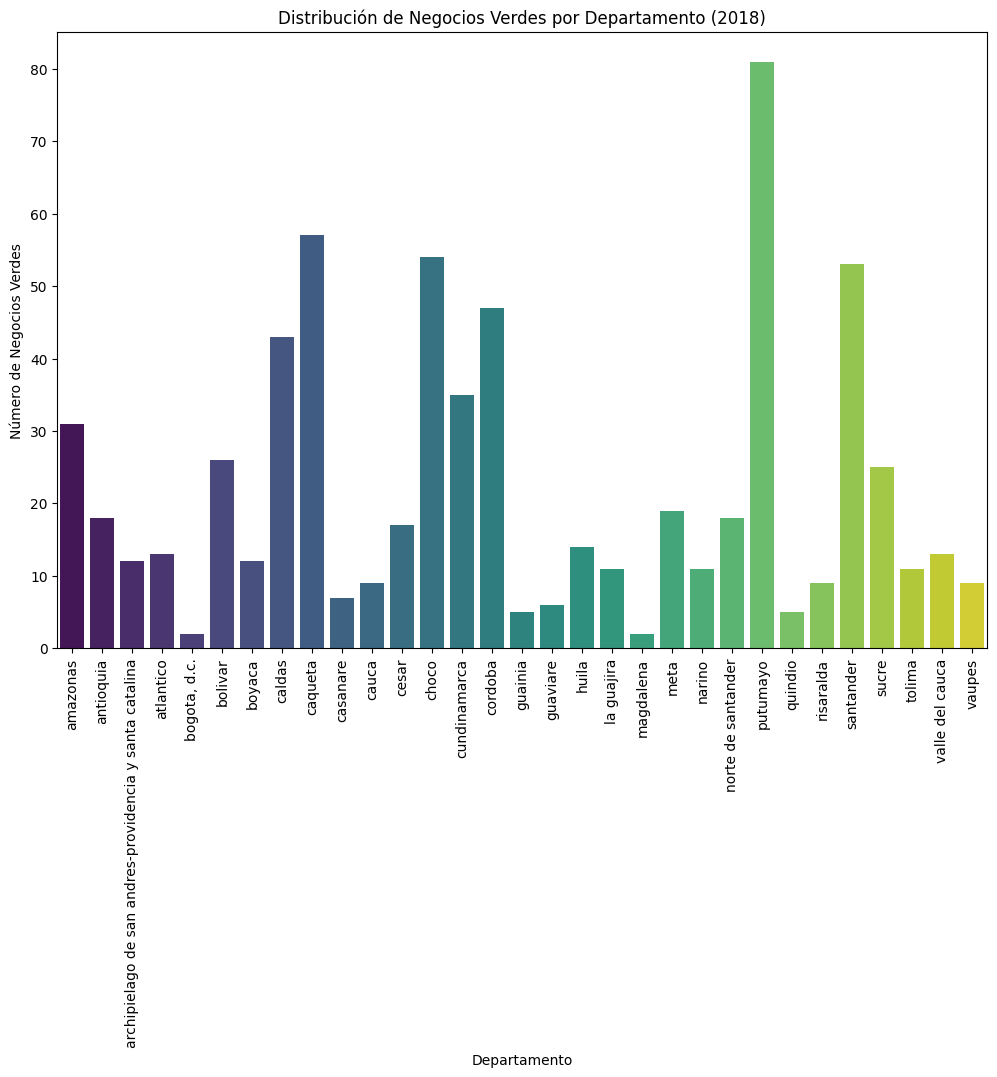

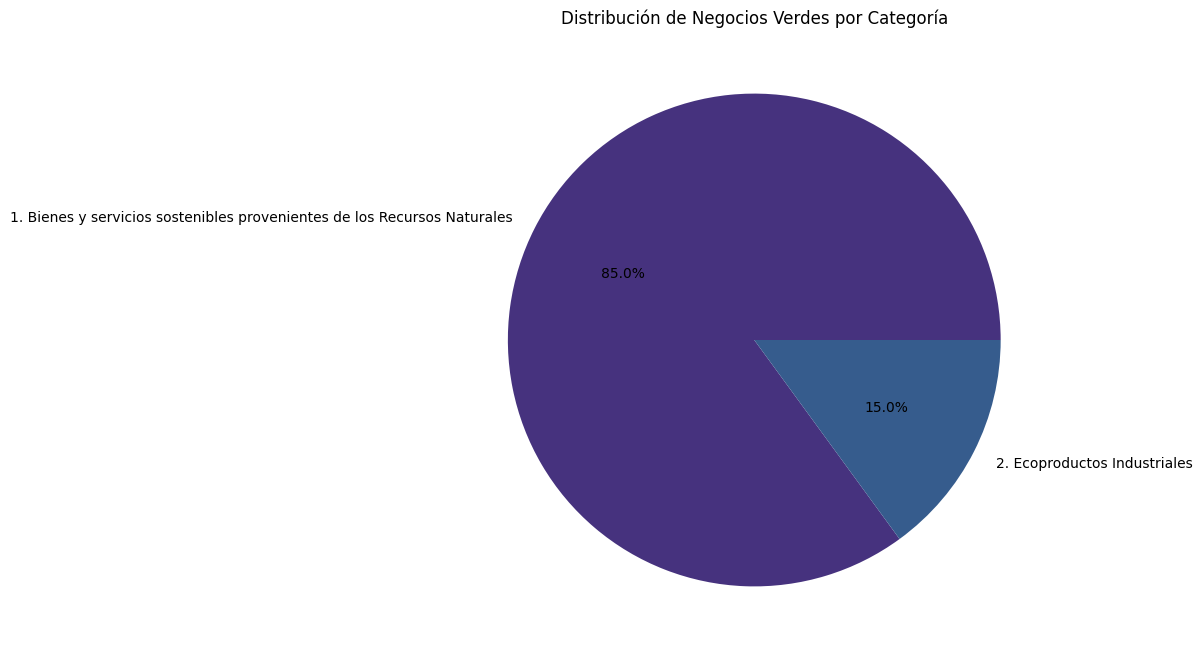

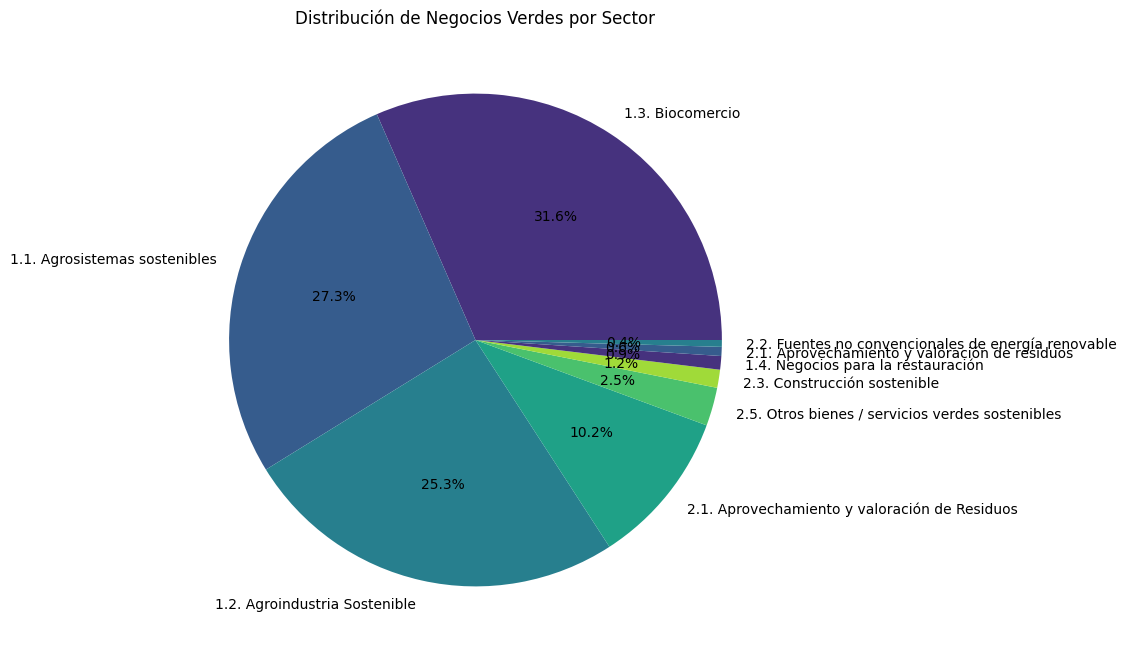

In [ ]:
print(df_final.head())

# Asegurarse de que 'Total_Negocios_Verdes' y 'Departamento' existen y están en el formato correcto
assert 'Total_Negocios_Verdes' in df_final.columns, "La columna 'Total_Negocios_Verdes' no está en df_final"
assert 'Departamento' in df_final.columns, "La columna 'Departamento' no está en df_final"

# Crear el gráfico de barras para la distribución de negocios por departamento
plt.figure(figsize=(12, 8))
sns.barplot(x=df_final['Departamento'], y=df_final['Total_Negocios_Verdes'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribución de Negocios Verdes por Departamento (2018)')
plt.xlabel('Departamento')
plt.ylabel('Número de Negocios Verdes')
plt.show()
# Gráficos de pastel para la distribución por categorías
plt.figure(figsize=(8, 8))
plt.pie(negocios_por_categoria.values, labels=negocios_por_categoria.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribución de Negocios Verdes por Categoría')
plt.show()

# Gráficos de pastel para la distribución por sectores
plt.figure(figsize=(8, 8))
plt.pie(negocios_por_sector.values, labels=negocios_por_sector.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribución de Negocios Verdes por Sector')
plt.show()


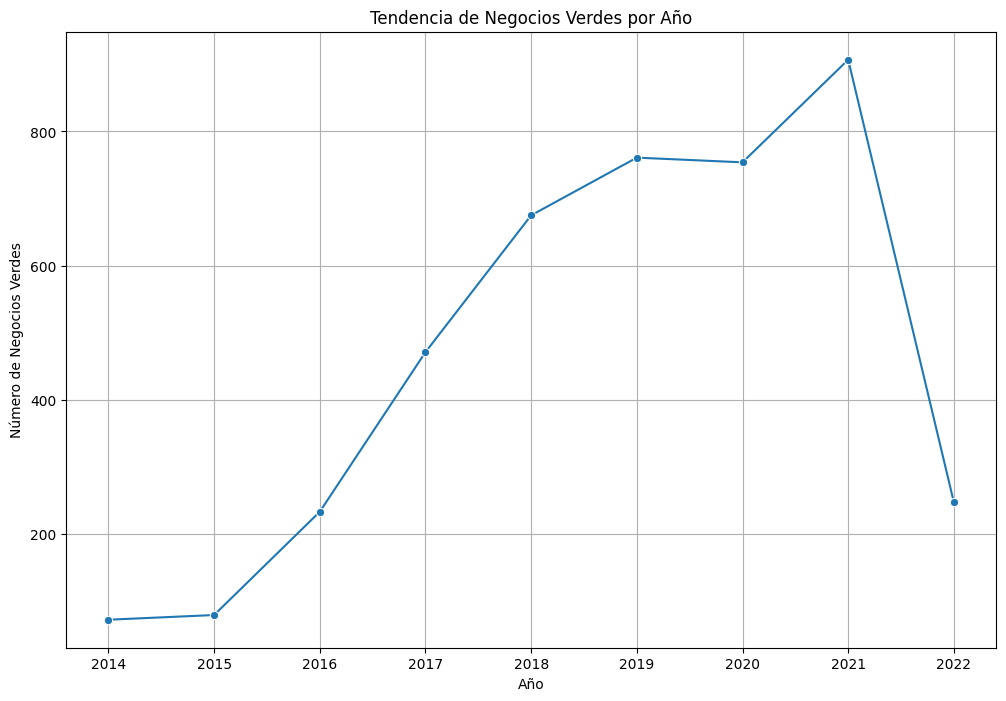

In [ ]:
negocios_por_año = df_negocios['AÑO'].value_counts().sort_index()

# Crear el gráfico de línea para la cantidad de negocios verdes por año
plt.figure(figsize=(12, 8))
sns.lineplot(x=negocios_por_año.index, y=negocios_por_año.values, marker='o', linestyle='-')
plt.title('Tendencia de Negocios Verdes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Negocios Verdes')
plt.xticks(negocios_por_año.index)
plt.grid(True)
plt.show()